In [1]:


import numpy as np
import matplotlib.pyplot as plt
import sys


-0.9814261721369637


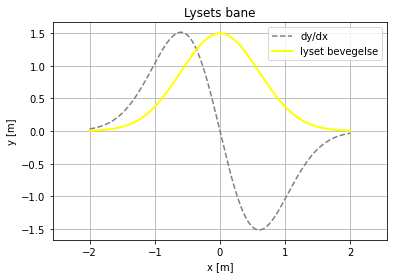

-0.7071067811865475


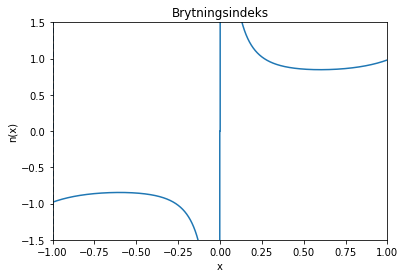

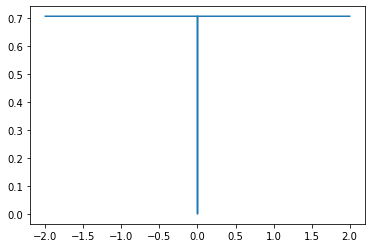

In [5]:

n_luft = 1
h0 = 1.5 # [m] height under cloak
A = h0
sigma0 = 0.6 # [m] std of gauss distr. - determines the witdh of the cloak underneath
sigma = sigma0

y = lambda x: A * np.exp(- x**2 / (2*sigma**2))
yder = lambda x: -x/(sigma)**2 * y(x)

x0 = -1
theta0 = np.pi /4
theta_ = - np.arctan(yder(x0))
n0 = np.sin(theta0) / np.sin(theta_)
print(n0)

def ref_index(x, y=y, yder=yder):
    K = -np.sin(theta0)*n_luft
    print(K)

    

    n = lambda x: K * np.sqrt(1+yder(x)**2) / yder(x)
    theta = lambda x: - np.arctan(yder(x))

    N = n(x)

    #N[np.abs(N)>5] = 1
    N[np.abs(x)<0.002] = 0

    return N, theta(x)


x = np.linspace(-2, 2, 5000)
plt.plot(x, yder(x), c='grey', ls='--', label='dy/dx')
plt.plot(x, y(x), c='yellow', lw=2, label='lyset bevegelse')
plt.axis('equal')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Lysets bane')
plt.legend()
plt.grid('--')
plt.show()


n1, theta = ref_index(x)
plt.plot(x,n1)
plt.title('Brytningsindeks')
plt.axvline(x0, ls='--')
plt.axis([x0, -x0, -1.5, 1.5])
plt.xlabel('x')
plt.ylabel('n(x)')
plt.show()


plt.plot(x, n1*np.sin(theta))
plt.show()

In [3]:
# Define parametres

# Harry's parametres:
h0 = 1.2 # [m] height under cloak
w0 = 19 # [m] 1/2 width of first layer
wN = w0 # [m] 1/2 width of last layer
sigma0 = 7 # [m] std of gauss distr. - determines the shape of the cloak underneath (i.e. how sharp)
N = 10 # no. of layers in cloak

# Voldemort's parametres:
H = 1.5 # [m] height of observant
L = 40 # [m] distance from first layer of cloak


In [4]:
l_ = wN
l0 = w0
A = h0
x1 = 19



def gauss(i, N):
    dh = 0.0001 # [m]
    dH = h0/(N-1)
    dsigma = 0.1
    dl = (l0-l_)/(N-1)
    hi = h0 + i*dh - i*dH
    sigmai = sigma0 + i * dsigma
    xi = - (l0 - i * dl)
    x = np.linspace(xi, l0*2, 1000)
    
    dx = x[1]-x[0]
    
    yi = hi * np.exp(-x**2/(2*sigmai**2)) + i*dH
    yider = lambda x: -x/sigmai**2 * hi * np.exp(-x**2/(2*sigmai**2))
    #yider = np.gradient(yi, dx)
    return x, yi, yider(x), yider(x1)

for i in range(N):
    x, y, yder, tull = gauss(i, N)
    plt.plot(x, y)
    plt.plot(x, yder, ls='--')
    
for i in range(N):
    x, y = gauss(i, N)[:-2]   
    plt.plot([-L-l0, x[0]], [H, y[0]])


    
plt.grid()    
plt.show()

K = np.sin(-theta0)
print(K)
    

n = lambda K, yder: K * np.sqrt(1 + yder*yder) / yder
#n = lambda K, yder: K / (np.sin(np.arctan(yder)))


theta0 =  np.arctan2(H,L)
thetaN = np.arctan2((H-h0),(L+l_))
print('her', theta0, thetaN)
dtheta = (thetaN-theta0)/(N-1)
theta = np.linspace(theta0, thetaN+dtheta, N)
                   
for i in range(N):
    x, y, yder, yider_x1 = gauss(i, N)
    print(np.sin(-theta[i]))
    
    ni = n(np.sin(-theta[i]), yder)
    #ni[np.abs(x)<0.02] = 0
    ni[np.abs(ni)>10] = 1
    plt.plot(x, ni)
    
    
plt.axis([-l0*1.1, l0*1.1, -2, 2])
plt.grid()    
plt.show()

                   
for i in range(N):
    x, y, yder, yider_x1 = gauss(i, N)
    phi = np.arctan2(yder,1)

    ni = n(np.sin(-theta[i]), yder)
    
    plt.plot(x, ni*np.sin(phi))
    
plt.show()


SyntaxError: invalid syntax (<ipython-input-4-46e664cc2e6a>, line 55)

In [ ]:

# Forsøk på klasse


class CloakedPerson:
    
    def __init__(self, name, height):
        self.name, self.h0 = name, height
        
    
class NonObservant:
    
    def __init__(self, name, height, distance):
        self.name, self.H, self.L = name, height, distance

class InvisibilityCloak:
    def __init__(self, N_layers, std_lim, w_lim):
        self.N_layers = N
        self.sigma1, self.sigmaN = std_lim
        self.w1, self.wN = w_lim
        
    def GaussCloak(self):
        pass
        
        
# or:
class SystemParams: # orsomethinglikethat
    
    def __init__(self):
        pass
    
    def SetCloakedPerson(self, name, height):
        self.name, self.h0 = name, height
        
    def SetNonObservant(self, name, height, distance):
        self.name, self.H, self.L = name, height, distance
    
    def DesignCloak()

        

In [ ]:
class MakeInvisibilityCloak:
    
    def __init__(self, cloakedperson, nonobservant, cloak):
        pass
    

